# Data Cleaning \& Feature Engineering Notebook

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import size_review_functions as fxn
import warnings
from matplotlib import cm
%matplotlib inline
sns.set(style="darkgrid")
warnings.simplefilter('ignore')

In [2]:
#getting data
modcloth_data = pd.read_json('modcloth_final_data.zip', lines=True)
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


## Cleaning:
Due to string entries on what shoud be numerical data, a function was created to conver these values

### Converting height entries to inches

In [3]:
modcloth_data.height = modcloth_data.height.apply(fxn.convert_feetinches_to_inches)
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [4]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null float64
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.4+ MB


It is evident that there are a lot of features with a lot of null values. But before proceeding with cleaning the null values, checking for duplicates should be done.

In [5]:
modcloth_data.duplicated().value_counts()

False    82413
True       377
dtype: int64

In [6]:
modcloth_data.drop_duplicates(keep = False, inplace= True)

In [7]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76070 non-null float64
bust              11738 non-null object
category          82036 non-null object
cup size          75835 non-null object
fit               82036 non-null object
height            80933 non-null float64
hips              55544 non-null float64
item_id           82036 non-null int64
length            82001 non-null object
quality           81968 non-null float64
review_summary    75343 non-null object
review_text       75343 non-null object
shoe size         27665 non-null float64
shoe width        18435 non-null object
size              82036 non-null int64
user_id           82036 non-null int64
user_name         82036 non-null object
waist             2880 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.9+ MB


## Plotting Numerical Data

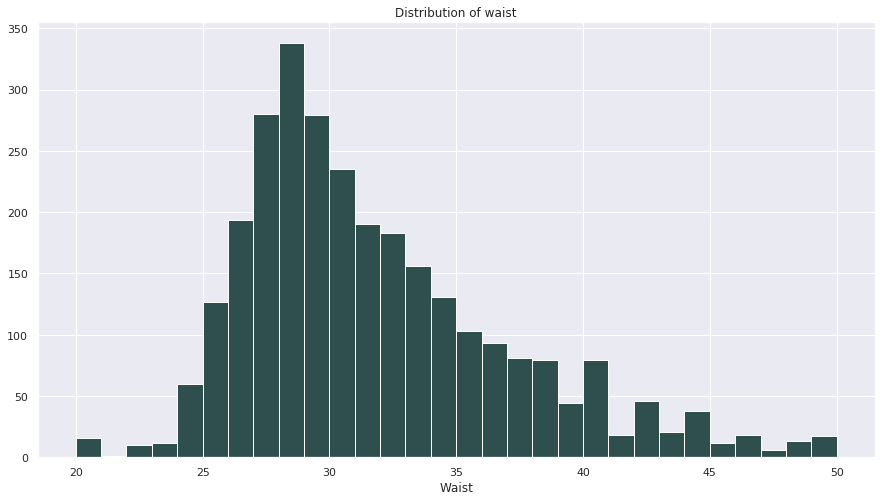

In [8]:
figure = plt.figure(figsize=(15, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['waist'], color="darkslategray",bins=30)
axes.set_title("Distribution of waist")
axes.set_xlabel("Waist")

plt.show()
plt.close()


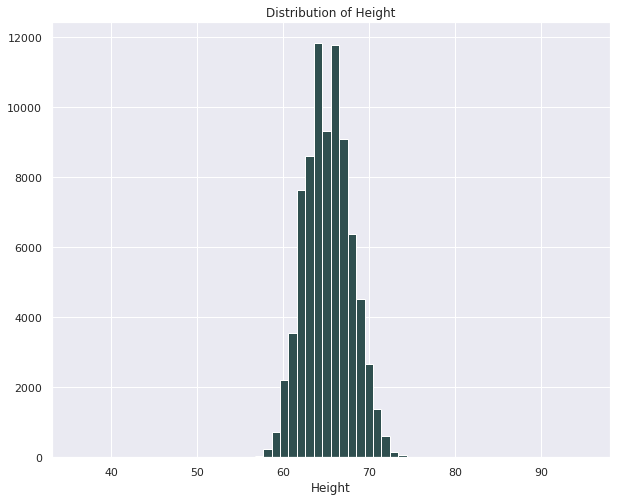

In [9]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['height'], color="darkslategray",bins=60)
axes.set_title("Distribution of Height")
axes.set_xlabel("Height")

plt.show()
plt.close()



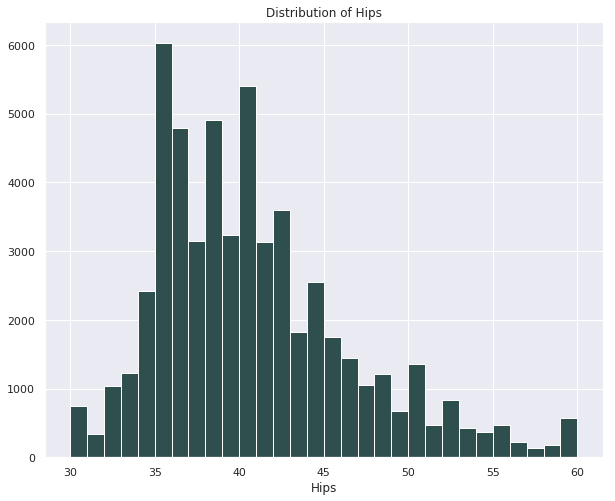

In [10]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['hips'], color="darkslategray",bins=30)
axes.set_title("Distribution of Hips")
axes.set_xlabel("Hips")

plt.show()
plt.close()



Based on the charts and what we deemed unnecessary fatures, we will drop column from the data frame

In [11]:
columns_to_drop_modcloth = [
    'bust','shoe size','shoe width','category','review_summary','review_text','user_name'
]
#create a new data fram to populate missing values  in features where majority are null
modcloth_sub = modcloth_data.drop(columns_to_drop_modcloth, axis = 1)

#Drop unusable and unnecessary features just to keep original dataframe without over filling the null values
modcloth_data.drop(columns_to_drop_modcloth, axis = 1,inplace = True)

modcloth_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 82789
Data columns (total 11 columns):
bra size    76070 non-null float64
cup size    75835 non-null object
fit         82036 non-null object
height      80933 non-null float64
hips        55544 non-null float64
item_id     82036 non-null int64
length      82001 non-null object
quality     81968 non-null float64
size        82036 non-null int64
user_id     82036 non-null int64
waist       2880 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 7.5+ MB


In [12]:
x = list(zip(modcloth_sub.waist,modcloth_sub.hips))
ratios = fxn.hip_waist_ratio(x)
modcloth_sub.waist = pd.Series(i[0] for i in ratios)
modcloth_sub.hips = pd.Series(i[1] for i in ratios)
modcloth_sub.head(10)

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,29.0
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,31.0
2,32.0,b,small,67.0,35.0,123373,slightly long,2.0,7,395665,30.0
3,NaN,dd/e,fit,NaN,NaN,123373,just right,5.0,21,875643,NaN
4,36.0,b,small,62.0,NaN,123373,slightly long,5.0,18,944840,NaN
5,36.0,c,small,64.0,41.0,123373,just right,5.0,11,162012,27.0
6,32.0,b,large,63.0,31.0,123373,just right,1.0,5,114843,26.0
7,38.0,d,small,65.0,42.0,123373,just right,5.0,11,58869,36.0
8,42.0,d,small,70.0,50.0,123373,just right,4.0,30,279568,42.0
9,36.0,dd/e,fit,66.0,41.0,123373,just right,5.0,13,950172,35.0


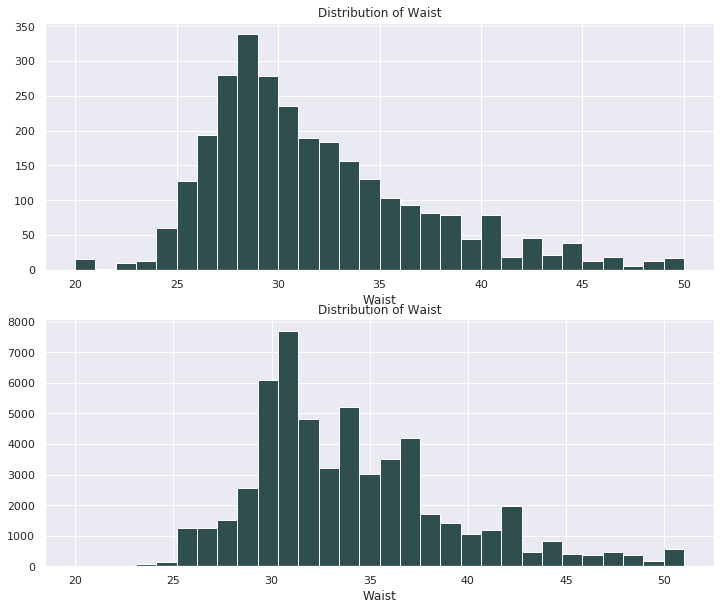

In [13]:
figure = plt.figure(figsize=(12, 10))

axes = figure.add_subplot(2, 1, 1)
axes.hist(modcloth_data['waist'], color="darkslategray",bins=30)
axes.set_title("Distribution of Waist")
axes.set_xlabel("Waist")


axes = figure.add_subplot(2, 1, 2)
axes.hist(modcloth_sub['waist'], color="darkslategray",bins=30)
axes.set_title("Distribution of Waist")
axes.set_xlabel("Waist")

plt.show()
plt.close()



In [14]:
modcloth_waist = modcloth_data[modcloth_data.waist.isnull()==False]
modcloth_waist.head()

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,29.0
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,31.0
2,32.0,b,small,67.0,NaN,123373,slightly long,2.0,7,395665,30.0
5,36.0,c,small,64.0,41.0,123373,just right,5.0,11,162012,27.0
6,32.0,b,large,63.0,NaN,123373,just right,1.0,5,114843,26.0


In [15]:
modcloth_waist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 0 to 82720
Data columns (total 11 columns):
bra size    2633 non-null float64
cup size    2574 non-null object
fit         2880 non-null object
height      2850 non-null float64
hips        2345 non-null float64
item_id     2880 non-null int64
length      2866 non-null object
quality     2841 non-null float64
size        2880 non-null int64
user_id     2880 non-null int64
waist       2880 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 270.0+ KB


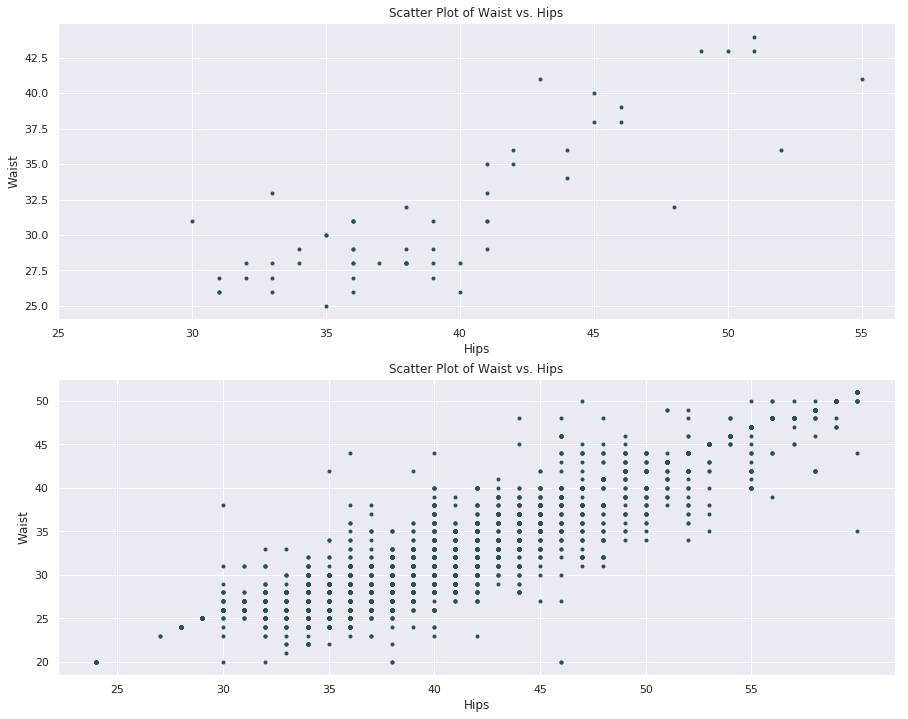

In [43]:
figure = plt.figure(figsize=(15, 12))

axes = figure.add_subplot(2, 1, 1)


axes.scatter(  modcloth_waist['hips'], modcloth_waist['waist'],marker=".", color="darkslategray")
axes.set_ylabel("Waist")
axes.set_xlabel("Hips")
axes.set_xticks(np.arange(25,60,step = 5))
axes.set_title("Scatter Plot of Waist vs. Hips")

axes = figure.add_subplot(2, 1, 2)
axes.scatter(  modcloth_sub['hips'], modcloth_sub['waist'],marker=".", color="darkslategray")
axes.set_xticks(np.arange(25,60,step = 5))
axes.set_ylabel("Waist")
axes.set_xlabel("Hips")
axes.set_title("Scatter Plot of Waist vs. Hips")

plt.show()
plt.close()

In [17]:
x = list(zip(modcloth_waist.waist,modcloth_waist.hips))
ratios = fxn.hip_waist_ratio(x)
modcloth_waist.waist = pd.Series(i[0] for i in ratios)
modcloth_waist.hips = pd.Series(i[1] for i in ratios)
modcloth_waist.head(10)

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,29.0
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,31.0
2,32.0,b,small,67.0,35.0,123373,slightly long,2.0,7,395665,30.0
5,36.0,c,small,64.0,34.0,123373,just right,5.0,11,162012,28.0
6,32.0,b,large,63.0,36.0,123373,just right,1.0,5,114843,31.0
239,34.0,dd/e,fit,65.0,41.0,124761,just right,3.0,7,242643,31.0
299,34.0,c,fit,67.0,40.0,125442,just right,5.0,11,575252,28.0
1066,34.0,a,fit,64.0,38.0,125602,just right,5.0,5,877917,28.0
1067,32.0,b,fit,64.0,40.0,126560,just right,5.0,4,138702,26.0
1068,36.0,c,fit,68.0,51.0,126560,slightly short,3.0,12,534811,44.0


In [18]:
modcloth_waist['hip_waist_ratio'] = modcloth_waist.waist/modcloth_waist.hips
modcloth_sub['hip_waist_ratio'] = modcloth_sub.waist/modcloth_sub.hips

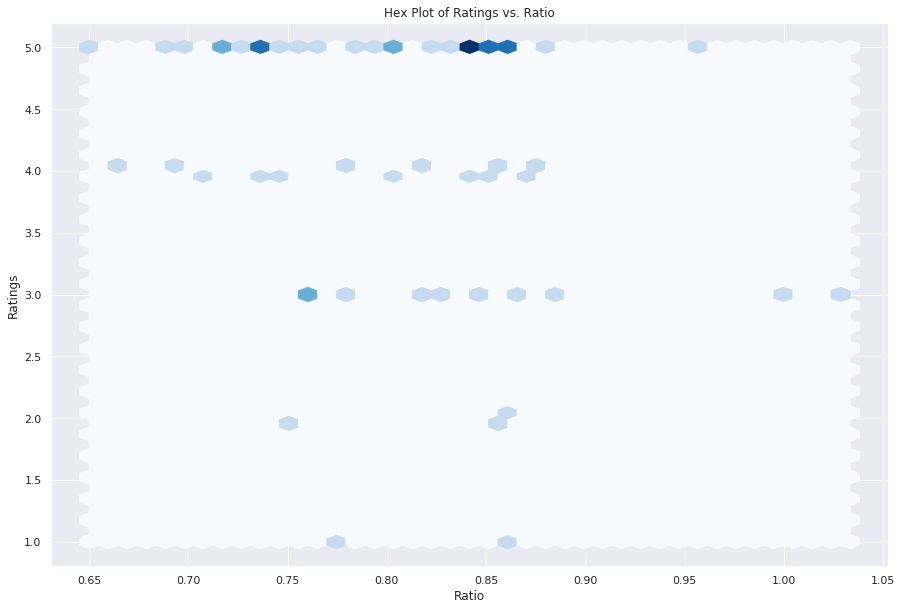

In [58]:
figure = plt.figure(figsize=(15, 10))

axes = figure.add_subplot(1, 1, 1)
#axes.scatter(   modcloth_waist['hip_waist_ratio'],modcloth_waist['quality'],marker="o", color="darkslategray", alpha = .4)
axes.hexbin(modcloth_waist['hip_waist_ratio'],modcloth_waist['quality'], gridsize=40, cmap=cm.Blues)
axes.set_ylabel("Ratings")
axes.set_xlabel("Ratio")
axes.set_title("Hex Plot of Ratings vs. Ratio")
plt.savefig('Rating_vs_Ratio.png')


plt.show()
plt.close()

In [20]:
high_risk = modcloth_waist[modcloth_waist.hip_waist_ratio>.85]
mod_risk = modcloth_waist[(modcloth_waist.hip_waist_ratio<=.85)&(modcloth_waist.hip_waist_ratio>.8)]
low_risk = modcloth_waist[modcloth_waist.hip_waist_ratio<=.8]

In [21]:
#T-test that rating of low and mod rsik people are equally high
stats.ttest_ind(low_risk.quality,mod_risk.quality, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=-0.6619982602016984, pvalue=0.5119715925194587)

In [22]:
#T-test that ratio affects high rating
stats.ttest_ind(mod_risk.quality,high_risk.quality, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=1.9892641083946638, pvalue=0.05669640289224266)

In [23]:
top_ratings = modcloth_sub[(modcloth_sub.length == 'just right')&(modcloth_sub.quality >=4.0)
                          &(modcloth_sub.fit == 'fit')]
top_ratings.describe()

,bra size,height,hips,item_id,quality,size,user_id,waist,hip_waist_ratio
count,31523.00000,33471.000000,22936.000000,33919.000000,33919.000000,33919.000000,33919.000000,22936.000000,22936.000000
mean,35.75935,65.075468,40.292335,461489.041157,4.569917,11.939945,499548.234028,34.141350,0.847524
std,3.16624,2.822904,5.828255,213281.285408,0.495095,7.954416,287253.726113,4.971169,0.021733
min,28.00000,36.000000,24.000000,123373.000000,4.000000,0.000000,6.000000,20.000000,0.526316
25%,34.00000,63.000000,36.000000,298256.000000,4.000000,8.000000,252224.000000,31.000000,0.842105
50%,36.00000,65.000000,39.000000,427567.000000,5.000000,10.000000,498979.000000,33.000000,0.850000
75%,38.00000,67.000000,43.000000,656172.000000,5.000000,15.000000,748031.000000,37.000000,0.857143
max,48.00000,95.000000,60.000000,807722.000000,5.000000,38.000000,999923.000000,51.000000,1.266667


In [24]:
modcloth_sub.describe()

,bra size,height,hips,item_id,quality,size,user_id,waist,hip_waist_ratio
count,76070.000000,80933.000000,55550.000000,82036.000000,81968.000000,82036.000000,82036.000000,55550.000000,55550.000000
mean,35.971079,65.142562,40.316436,469510.119204,3.949126,12.657809,498788.808755,34.162772,0.847535
std,3.223979,2.849230,5.848532,214136.368217,0.992892,8.269573,286293.903277,4.992317,0.021790
min,28.000000,36.000000,24.000000,123373.000000,1.000000,0.000000,6.000000,20.000000,0.434783
25%,34.000000,63.000000,36.000000,314980.000000,3.000000,8.000000,252931.750000,31.000000,0.843137
50%,36.000000,65.000000,39.000000,454030.000000,4.000000,12.000000,497571.000000,33.000000,0.850000
75%,38.000000,67.000000,43.000000,658440.000000,5.000000,15.000000,744574.000000,37.000000,0.857143
max,48.000000,95.000000,60.000000,807722.000000,5.000000,38.000000,999972.000000,51.000000,1.266667


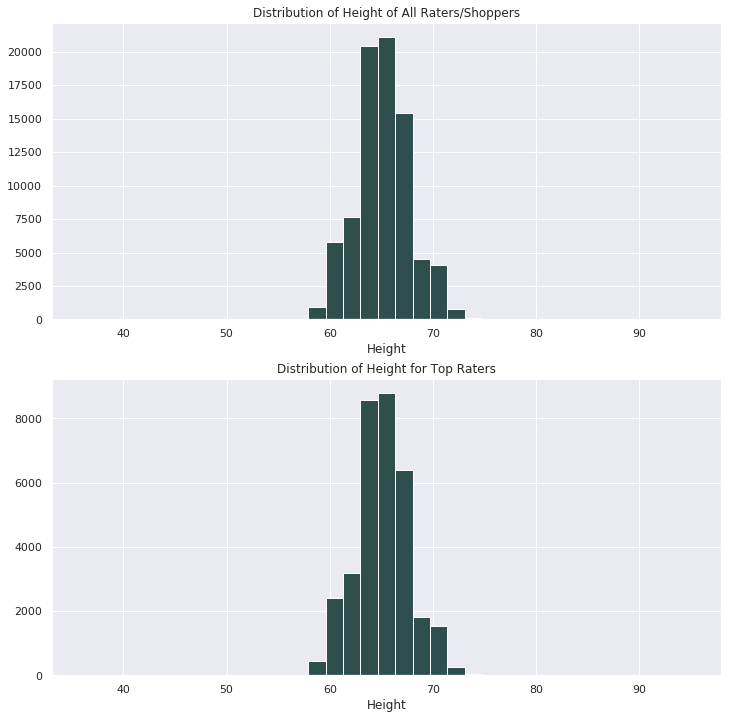

In [48]:
figure = plt.figure(figsize=(12, 12))



axes = figure.add_subplot(2, 1, 1)
axes.hist(modcloth_sub['height'], color="darkslategray",bins=35)
axes.set_title("Distribution of Height of All Raters/Shoppers")
axes.set_xlabel("Height")


axes = figure.add_subplot(2, 1, 2)
axes.hist(top_ratings['height'], color="darkslategray",bins=35)
axes.set_title("Distribution of Height for Top Raters")
axes.set_xlabel("Height")
plt.savefig('Height_Comparison.png')
plt.show()

plt.close()



In [25]:
#T-test that the mean height is the same as the total population
stats.ttest_ind(modcloth_sub.height,top_ratings.height, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=3.6473478747209196, pvalue=0.0002651745846712792)

In [26]:
#T-test that the mean hip to waist ratio is the same as the total population
stats.ttest_ind(modcloth_sub.hip_waist_ratio,top_ratings.hip_waist_ratio, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=0.06522224924484998, pvalue=0.9479973505636735)

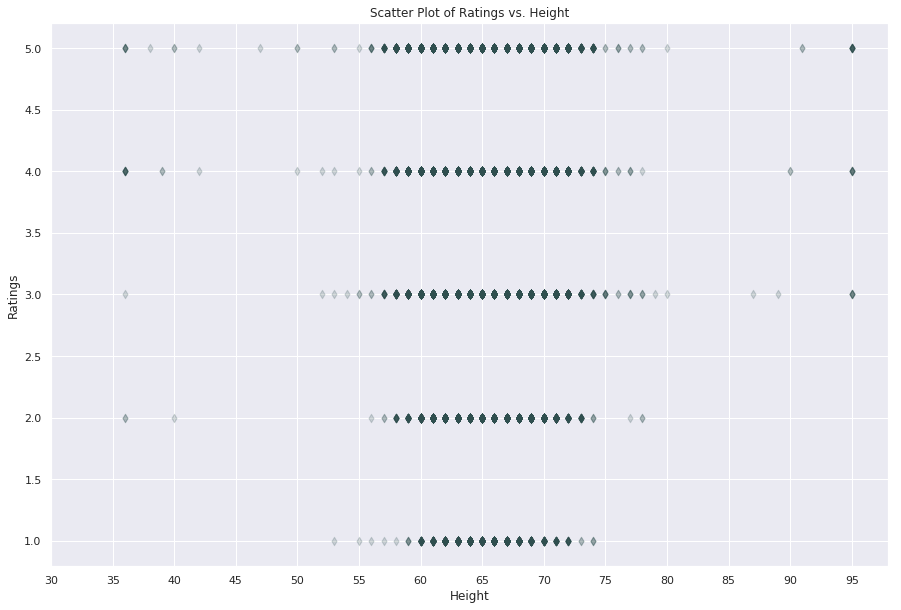

In [27]:
figure = plt.figure(figsize=(15, 10))

axes = figure.add_subplot(1, 1, 1)
#sns.scatterplot(x = 'height', y = 'quality',data = modcloth_sub, alpha = .2)
axes.scatter(   modcloth_sub['height'],modcloth_sub['quality'],marker="d", color="darkslategray", alpha = .2)
#axes.hexbin(modcloth_sub['height'],modcloth_sub['quality'],gridsize = 15, cmap=cm.binary)
axes.set_ylabel("Ratings")
axes.set_xlabel("Height")
axes.set_xticks(np.arange(30,100, step = 5))
axes.set_title("Scatter Plot of Ratings vs. Height")



plt.show()
plt.savefig('Rating_vs_Height.png')
plt.close()

In [45]:
modcloth_sub['transformed_Rating'] = modcloth_sub.quality*2
modcloth_sub.to_csv('modcloth_data_final.csv')
modcloth_waist.to_csv('modcloth_data_with_waist.csv')
top_ratings.to_csv('modcloth_top_ratings.csv')

In [51]:
rtr_data = pd.read_csv('rtr_clean.csv')